In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("H:\indian_liver_patient.csv")
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [3]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [4]:
df.Dataset.shape

(583,)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
print('Number of people in Dataset 1',df[df['Dataset'] == 1].Age.count())
print('Number of people in Dataset 2',df[df['Dataset'] == 2].Age.count())

Number of people in Dataset 1 416
Number of people in Dataset 2 167


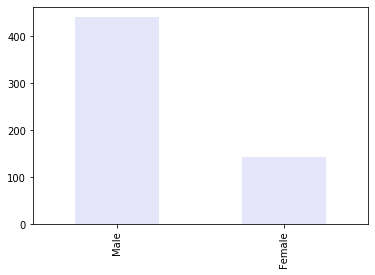

In [10]:
#we can see that Number of males are more than the Number of females.
df['Gender'].value_counts().plot.bar(color='lavender') 

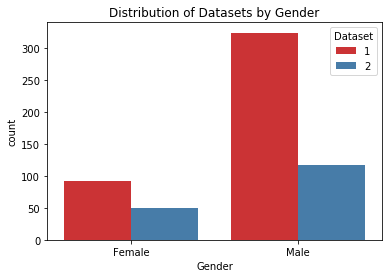

In [11]:
sns.countplot(x='Gender',data=df,hue='Dataset',palette="Set1")
plt.title('Distribution of Datasets by Gender')
plt.show()
## Gender Distribution of 2 Dataset

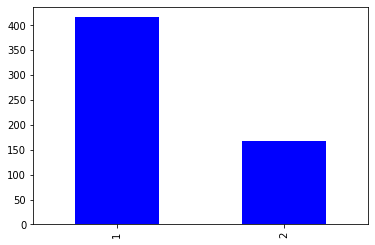

In [12]:
#we can see that Number of patients has liver disease or not
df['Dataset'].value_counts().plot.bar(color='blue')

In [13]:
df.isnull().sum() #check for the null values...

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [14]:
df['Albumin_and_Globulin_Ratio'].mean()

0.9470639032815197

In [15]:
#we have filled the null values with the mean of that column
df=df.fillna(0.94) 

In [16]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

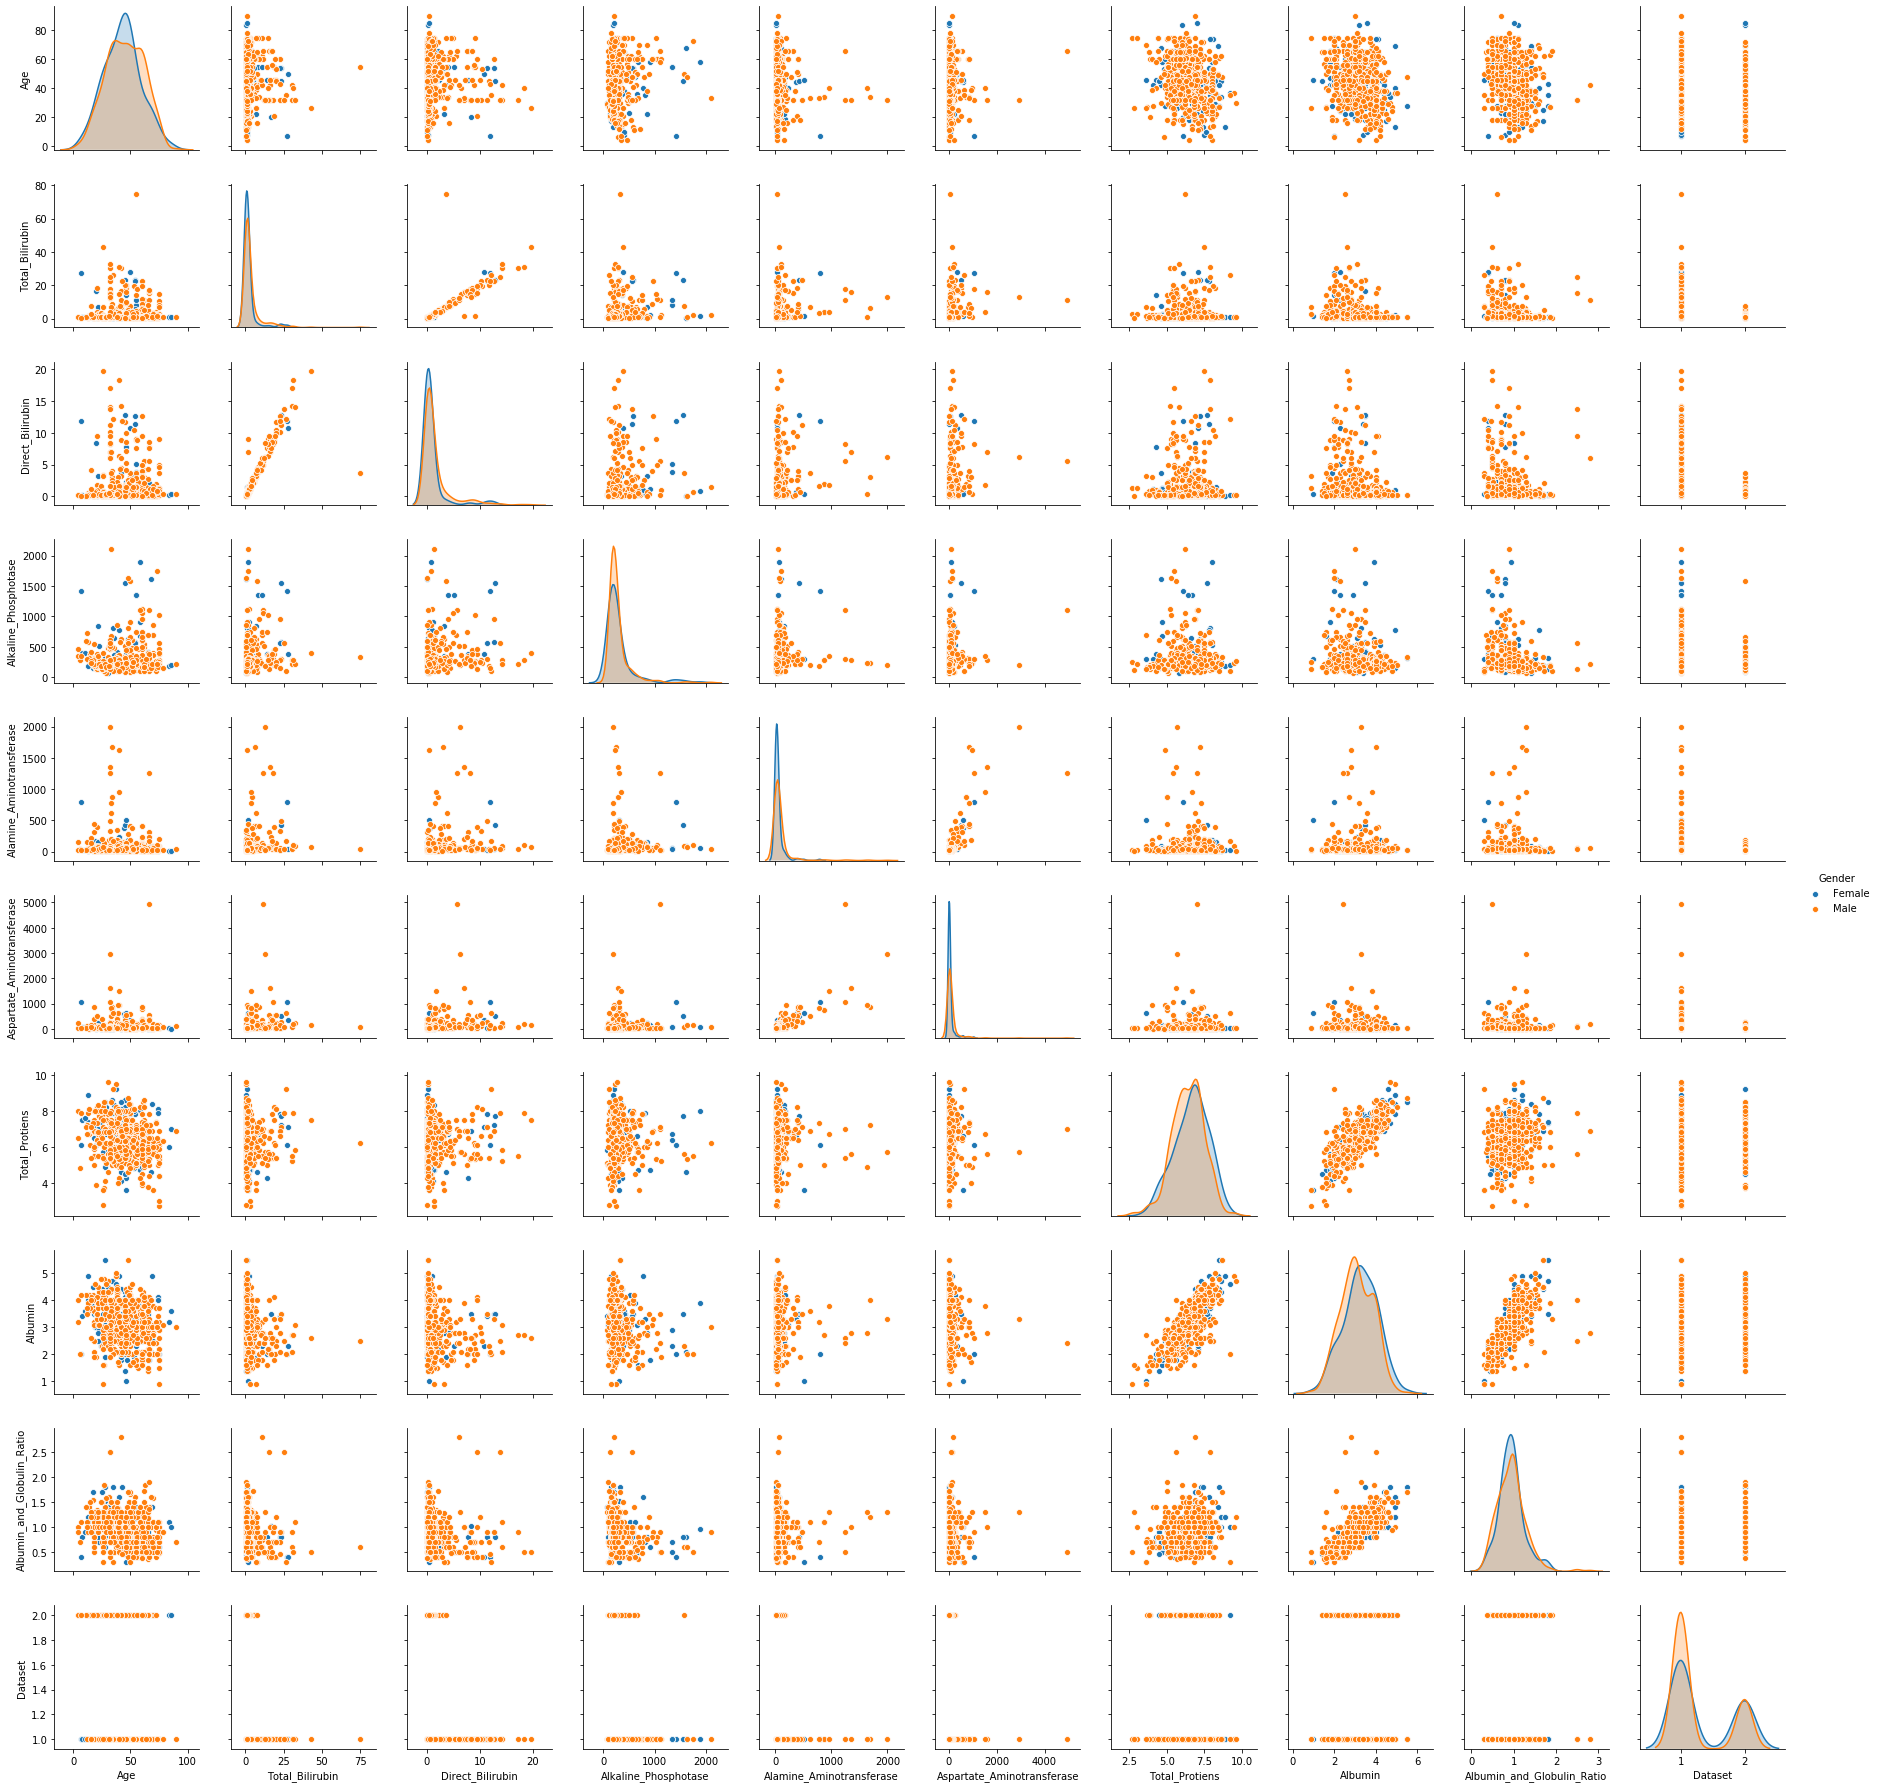

In [17]:
plt.rcParams['figure.figsize']=(10,10)
sns.pairplot(df,hue='Gender')
#the pairplot of patients based on Gender.

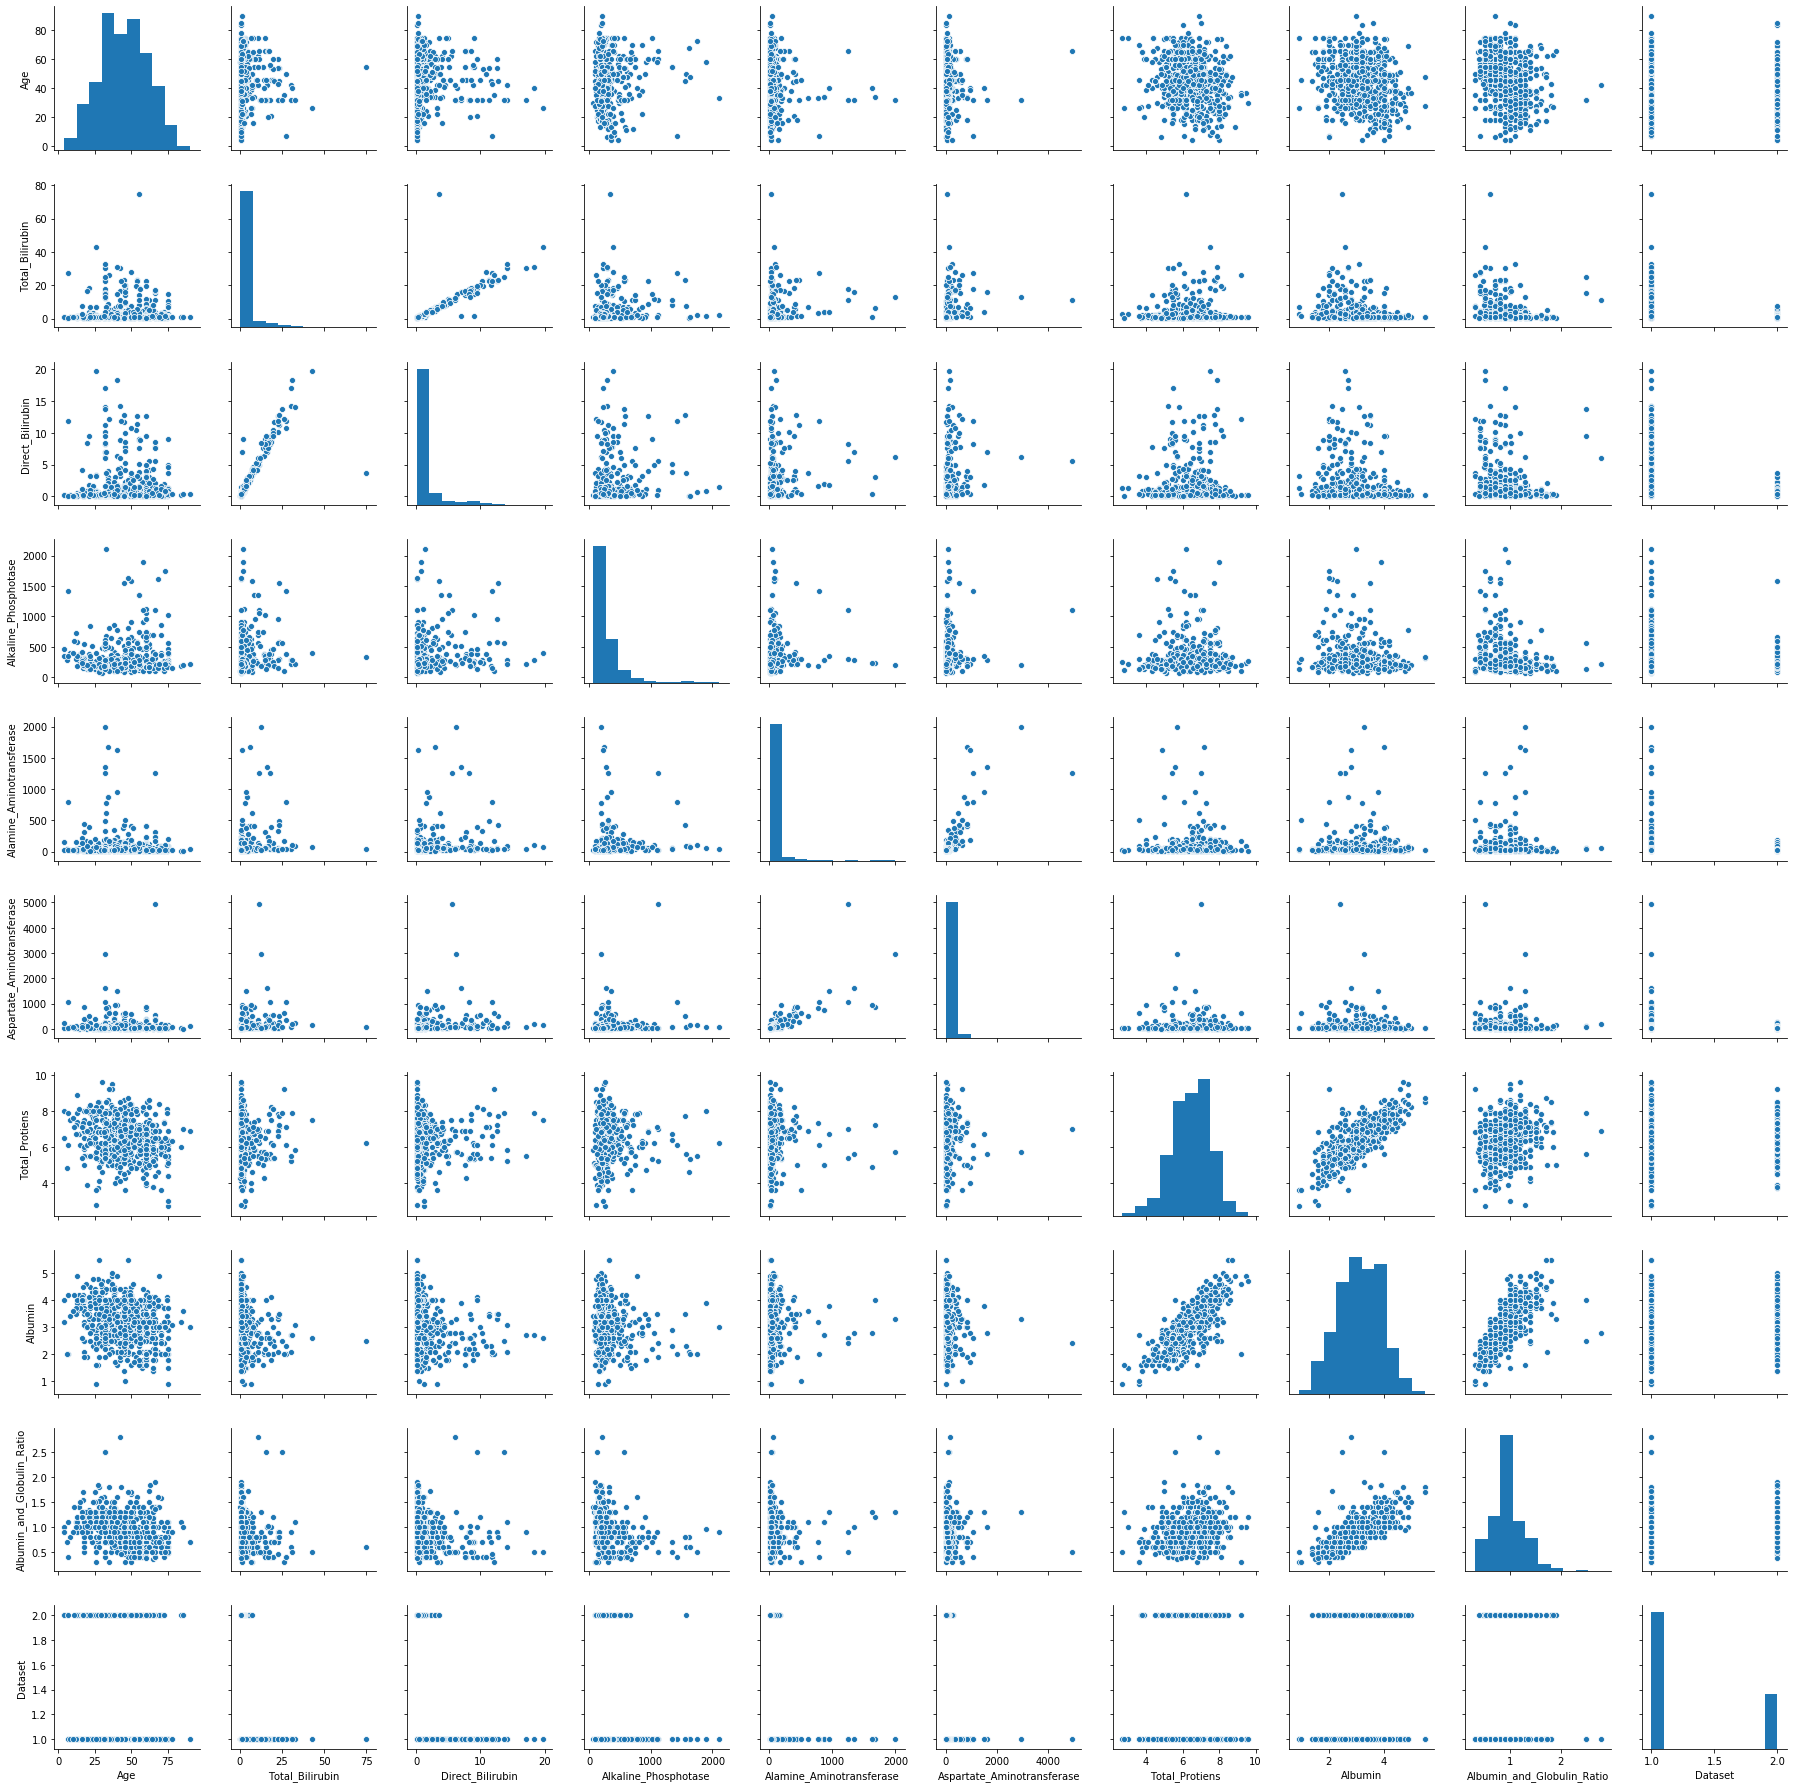

In [18]:
sns.pairplot(df)

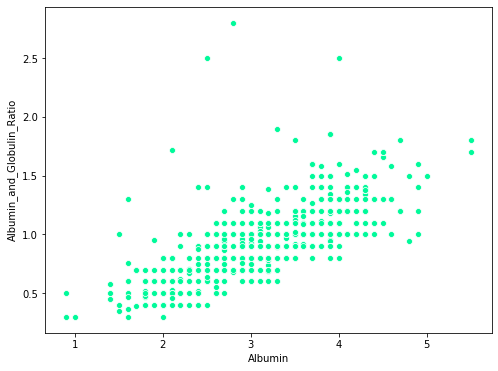

In [19]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="Albumin", y="Albumin_and_Globulin_Ratio",color='mediumspringgreen',data=df);
plt.show()
#compare the 'albumin' and 'albumin and globulin' ratio by a scatterplot.

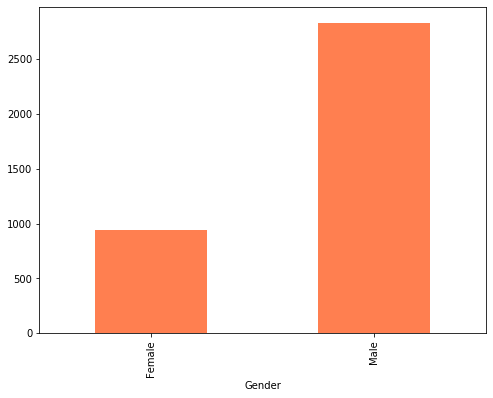

In [20]:
plt.figure(figsize=(8,6))
df.groupby('Gender').sum()["Total_Protiens"].plot.bar(color='coral')
#compare the Gender based on the Protein Intake.
#So protein intake is higher in the case of Male and comparitively less in females.

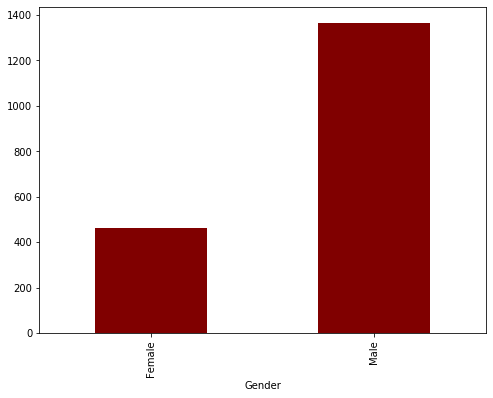

In [21]:
plt.figure(figsize=(8,6))
df.groupby('Gender').sum()['Albumin'].plot.bar(color='maroon')
# compare male and female based on Albumin Level.
#Albumin Level is higher in the case in the case of male compared to female.

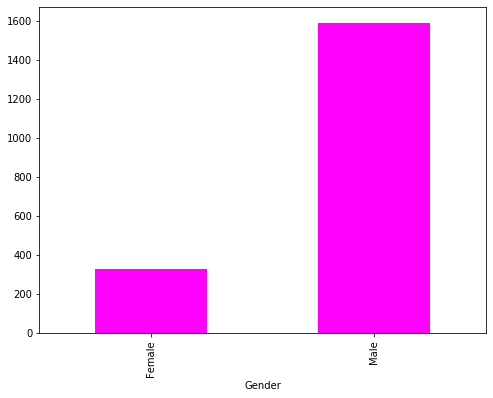

In [22]:
plt.figure(figsize=(8,6))
df.groupby('Gender').sum()['Total_Bilirubin'].plot.bar(color='fuchsia')
# compare them based on the Bilirubin content.
#We can clearly see that males has more bilirubin content compared to females.

### Another point to be noted here is that higher the Bilirubin content, higher the case is prone to Liver disease.

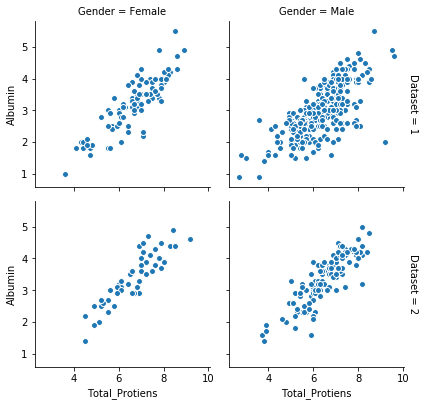

In [23]:
g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w")
plt.subplots_adjust(top=0.9)
## There is linear relationship between Total_Protiens and Albumin and the gender. We have the possibility of removing one of this feature.

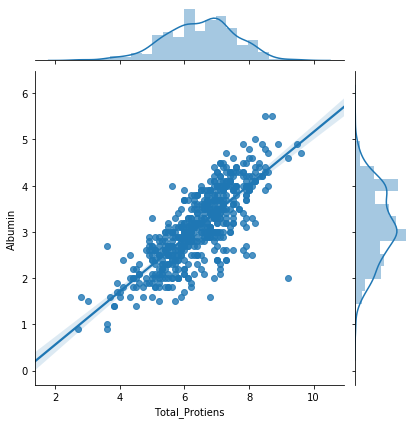

In [24]:
sns.jointplot("Total_Protiens", "Albumin", data=df, kind="reg")

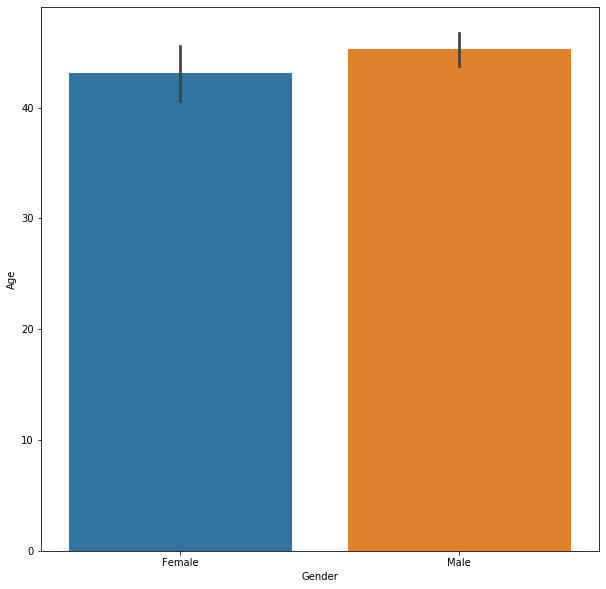

In [25]:
sns.barplot(x='Gender',y='Age',data =df)

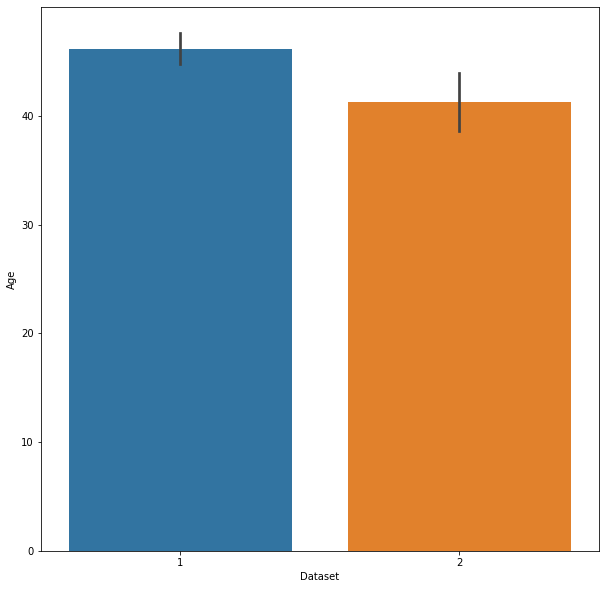

In [26]:
sns.barplot(x='Dataset',y='Age',data =df)
# Mean Age is roughly the same for both predictions

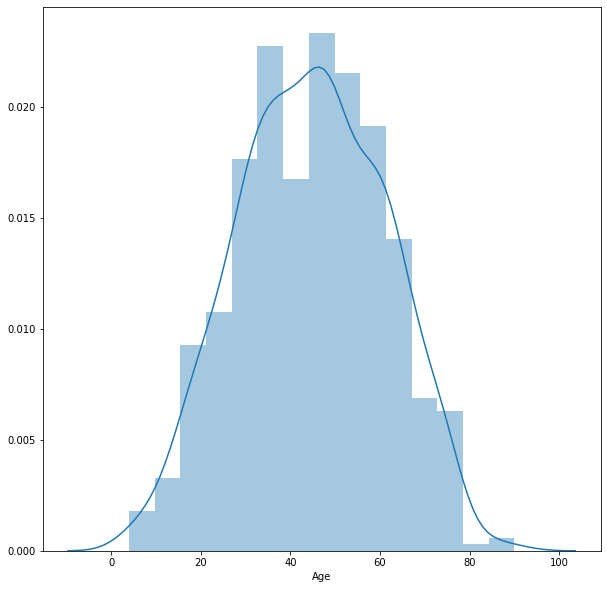

In [27]:
sns.distplot(df['Age'])
## Age looks almost normally distributed